# Interpolative Decomposition

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt

## Obtain a low-rank matrix

2.33628648847e-13


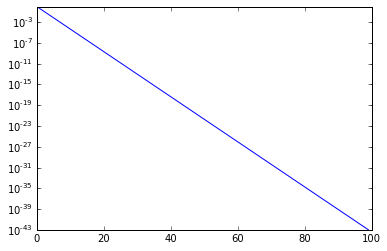

In [5]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0).dot(VT0) - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)
pt.semilogy(sigma)

## Run the factorization

In [4]:
import scipy.linalg.interpolative as sli

Compute a fixed-rank factorization:

(There's also an adaptive, fixed-precision mode.)

In [17]:
k = 20
idx, proj = sli.interp_decomp(A, k)

What does `numpy.argsort` do?

In [25]:
idx

array([49, 40, 43, 58, 46, 27, 89, 17,  1, 83, 29, 47, 98, 25,  8, 41, 36,
       99, 82, 70, 20, 21, 22, 23, 24, 13, 26,  5, 28, 10, 30, 31, 32, 33,
       34, 35, 16, 37, 38, 39, 14, 15, 42,  2, 44, 45,  4, 11, 48,  0, 50,
       51, 52, 53, 54, 55, 56, 57,  3, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 19, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 18,  9, 84,
       85, 86, 87, 88,  6, 90, 91, 92, 93, 94, 95, 96, 97, 12,  7], dtype=int32)

In [24]:
sort_idx = np.argsort(idx)

In [23]:
idx[sort_idx]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int32)

Reconstruct the matrix:

In [30]:
B = A[:,idx[:k]]
P = np.hstack([np.eye(k), proj])[:,np.argsort(idx)]
Aapprox = np.dot(B, P)

In [31]:
la.norm(A - Aapprox, 2)

5.334576300196075e-09

What's the structure of $P$?

(ignoring the column permuation)

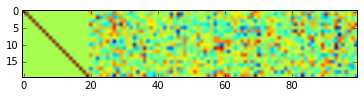

In [29]:
pt.imshow(np.hstack([np.eye(k), proj]))

* Why don't we use *just* the ID then?
* Reasonable question, answer is: we should.
* BUT: The ID as called above is based on the same randomized machinery that we've built up, so it's not like we'd *actually* reduce complexity that way.